In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from math import sqrt
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("train.csv")
# data.head()

In [3]:
data.shape

(1460, 81)

## Препроцессинг данных

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data = data.drop(columns=['Id'])

## Последующие задания

In [6]:
from sklearn.model_selection import train_test_split

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

numeric = list(X.dtypes[X.dtypes != "object"].index)
categorical = list(X.dtypes[X.dtypes == "object"].index)

X_n = X[numeric]
X_cat = X[categorical]

X_n.fillna(0, inplace=True)
X_cat.fillna("NotGiven", inplace=True)

X = pd.concat([X_n, X_cat], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

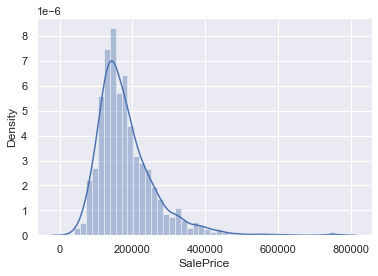

In [7]:
sns.distplot(y_train)

In [8]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train[numeric], y_train)
model.score(X_test[numeric], y_test)

0.8301388056822957

In [10]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train[numeric], y_train)
model.score(X_test[numeric], y_test)

0.8303219729837285

In [11]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train[numeric], y_train)
model.score(X_test[numeric], y_test)

0.8301569000695334

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [12]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
from sklearn.metrics import make_scorer, mean_squared_error
RMSE = make_scorer(lambda y_pred, y: sqrt(mean_squared_error(y_pred, y)))

In [13]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

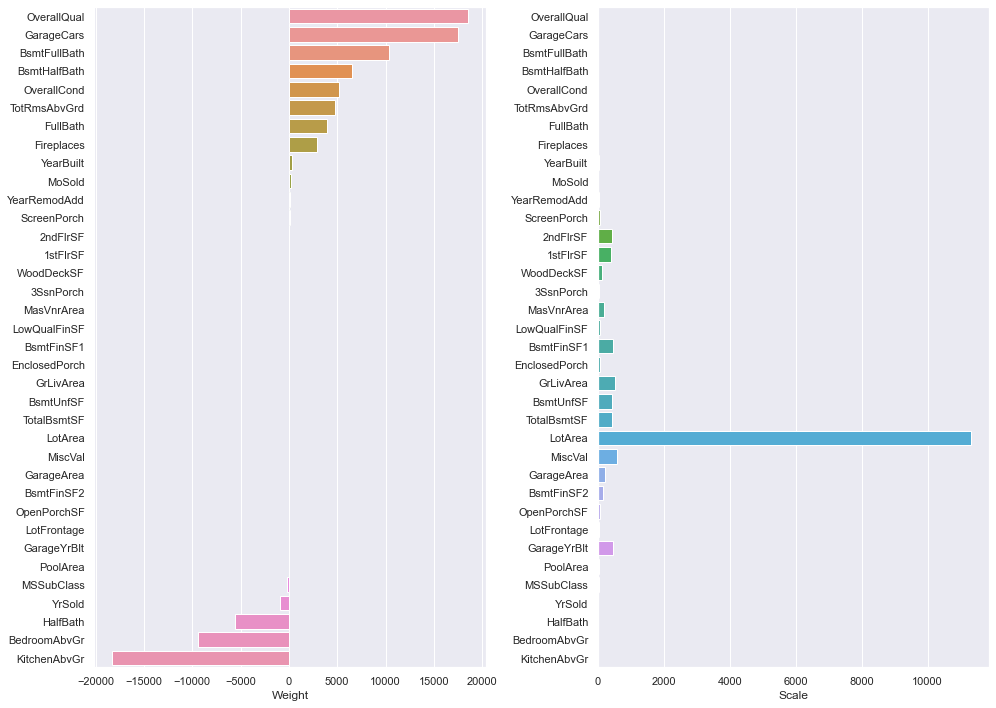

In [14]:
show_weights(numeric, model.coef_, X_train[numeric].std())

In [15]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

to_scale = X_n
scaler.fit(to_scale)
to_scale = scaler.transform(to_scale)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(to_scale, y, test_size=0.3, random_state=10)

In [16]:
model = Lasso()
model.fit(X_train_scaled, y_train)

Lasso()

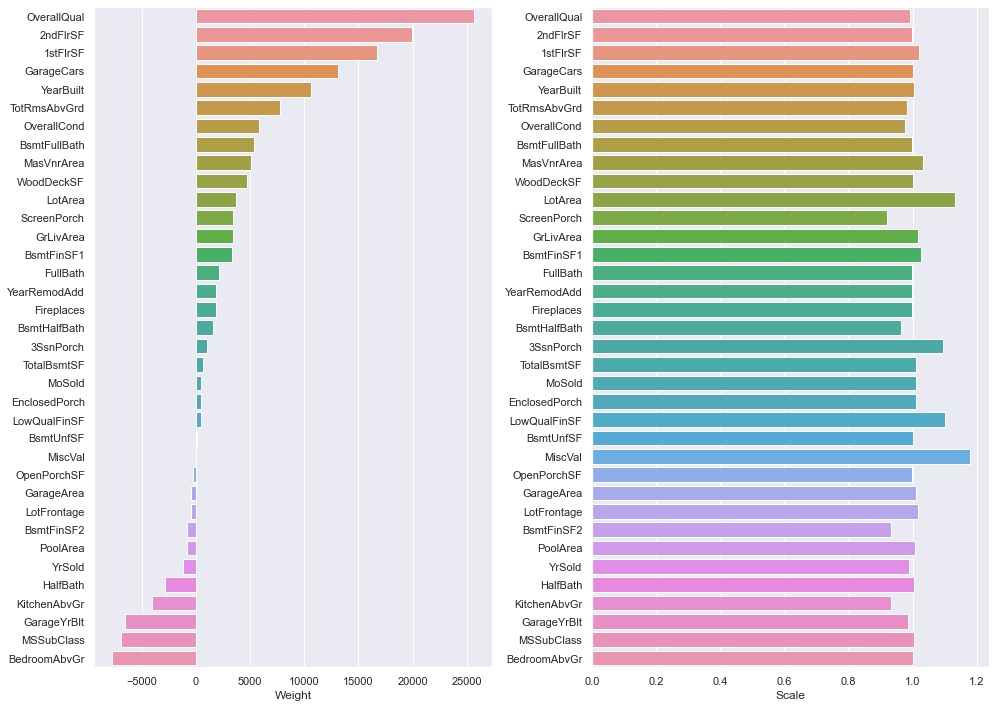

In [17]:
scales = pd.Series(data=X_train_scaled.std(axis=0))
show_weights(numeric, model.coef_, scales)

In [18]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
# TO DO
from sklearn.model_selection import GridSearchCV

In [19]:
gbr_grid_search = GridSearchCV(Ridge(), 
                               [{'alpha': np.linspace(0.1, 5, 40)}],
                               cv=5,
                               error_score='raise',
                               scoring=RMSE,
                               verbose=0)

gbr_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Ridge(),
             param_grid=[{'alpha': array([0.1       , 0.22564103, 0.35128205, 0.47692308, 0.6025641 ,
       0.72820513, 0.85384615, 0.97948718, 1.10512821, 1.23076923,
       1.35641026, 1.48205128, 1.60769231, 1.73333333, 1.85897436,
       1.98461538, 2.11025641, 2.23589744, 2.36153846, 2.48717949,
       2.61282051, 2.73846154, 2.86410256, 2.98974359, 3.11538462,
       3.24102564, 3.36666667, 3.49230769, 3.61794872, 3.74358974,
       3.86923077, 3.99487179, 4.12051282, 4.24615385, 4.37179487,
       4.4974359 , 4.62307692, 4.74871795, 4.87435897, 5.        ])}],
             scoring=make_scorer(<lambda>))

In [20]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 0.1}
41332.378721443245
Ridge(alpha=0.1)


In [21]:
gbr_grid_search = GridSearchCV(Lasso(), 
                               [{'alpha': np.linspace(1, 10, 10)}],
                               cv=5,
                               error_score='raise',
                               scoring=RMSE,
                               verbose=0)
gbr_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Lasso(),
             param_grid=[{'alpha': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}],
             scoring=make_scorer(<lambda>))

In [22]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 1.0}
41332.45505656207
Lasso()


In [23]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X[numeric], y, test_size=0.3, random_state=10)

In [26]:
pipe = Pipeline([('scaler', StandardScaler()), ('LinearRegression', LinearRegression())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8300318969484586

In [27]:
pipe = Pipeline([('scaler', StandardScaler()), ('Ridge', Ridge(alpha=0.001))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8301389153708134

In [28]:
pipe = Pipeline([('scaler', StandardScaler()), ('Lasso', Lasso(alpha=0.0001))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8301388067396498

### Теперь работаем с категориальными фичами

In [29]:
categorical = list(X.dtypes[X.dtypes == "object"].index)
X_categorial = X[categorical].fillna("NotGiven")

In [30]:
# X_categorial[categorical].sample(5)

In [31]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках

In [32]:
for cat in categorical:
    X_cat = pd.concat([X_cat, pd.get_dummies(X_cat[cat])], axis=1).drop(columns=[cat])

In [33]:
print("Size before OneHot:", X[categorical].shape)
print("Size after OneHot:", X_cat.shape)

Size before OneHot: (1460, 43)
Size after OneHot: (1460, 268)


In [34]:
X_n = pd.DataFrame(StandardScaler().fit_transform(X_n))
X = pd.concat([X_n, X_cat], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [35]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

In [36]:
from sklearn.linear_model import Lasso
model1 = Lasso(alpha=1)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8795291412023527

In [37]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=1)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.884329646176422

In [38]:
ridge_zeros = np.sum(model2.coef_ == 0)
lasso_zeros = np.sum(model1.coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 10
Zero weights in Lasso: 41


In [39]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
gbr_grid_search = GridSearchCV(Lasso(), 
                               [{'alpha': np.linspace(10**-8, 10**-2, 100)}],
                               cv=5,
                               error_score='raise',
                               scoring=RMSE,
                               verbose=0)
gbr_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000e-08, 1.01020e-04, 2.02030e-04, 3.03040e-04, 4.04050e-04,
       5.05060e-04, 6.06070e-04, 7.07080e-04, 8.08090e-04, 9.09100e-04,
       1.01011e-03, 1.11112e-03, 1.21213e-03, 1.31314e-03, 1.41415e-03,
       1.51516e-03, 1.61617e-03, 1.71718e-03, 1.81819e-03, 1.91920e-03,
       2.02021e-03, 2.12122e-03, 2....
       7.07071e-03, 7.17172e-03, 7.27273e-03, 7.37374e-03, 7.47475e-03,
       7.57576e-03, 7.67677e-03, 7.77778e-03, 7.87879e-03, 7.97980e-03,
       8.08081e-03, 8.18182e-03, 8.28283e-03, 8.38384e-03, 8.48485e-03,
       8.58586e-03, 8.68687e-03, 8.78788e-03, 8.88889e-03, 8.98990e-03,
       9.09091e-03, 9.19192e-03, 9.29293e-03, 9.39394e-03, 9.49495e-03,
       9.59596e-03, 9.69697e-03, 9.79798e-03, 9.89899e-03, 1.00000e-02])}],
             scoring=make_scorer(<lambda>))

In [40]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)

{'alpha': 1e-08}
41333.73208465103


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

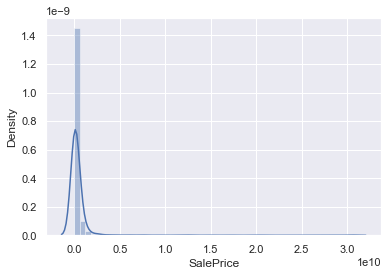

In [41]:
error = (y_train - model1.predict(X_train)) ** 2
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [42]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
for i in X_n.columns:
    idx = X_train.index[X_train[i] > X_train[i].std()*3*0.95]
    X_train.drop(idx, inplace=True)
    y_train.drop(idx, inplace=True)
X_train.shape, y_train.shape

((672, 304), (672,))

In [43]:
model1 = Lasso(alpha=1)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.849087040506759

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

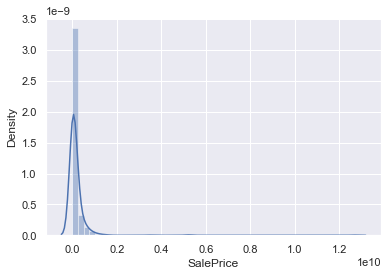

In [44]:
error = (y_train - model1.predict(X_train)) ** 2
sns.distplot(error)

In [45]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO

In [46]:
gbr_grid_search = GridSearchCV(Lasso(), 
                               [{'alpha': [1]}],
                               cv=5,
                               error_score='raise',
                               scoring=RMSE,
                               verbose=0)
gbr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Lasso(),
             param_grid=[{'alpha': [1]}], scoring=make_scorer(<lambda>))

In [47]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 1}
20755.685971981573
Lasso(alpha=1)


In [48]:
gbr_grid_search = GridSearchCV(Ridge(), 
                               [{'alpha': np.linspace(1, 10, 10)}],
                               cv=5,
                               error_score='raise',
                               scoring=RMSE,
                               verbose=0)

gbr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Ridge(),
             param_grid=[{'alpha': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}],
             scoring=make_scorer(<lambda>))

In [49]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 1.0}
18956.674710746738
Ridge()
